In [1]:
import HYuPlot as hyuplt 
import FerrersModel as ferrers
import numpy as np
import matplotlib.pyplot as plt

This is a short demonstration on how to use FerrersModel and HYuPlot modules to play with orbits

Let's first define an initial condition with the InitialCondition class

In [2]:
# define an initial condition

# This can be down by ej,x0=0,y0=0,direction=0 deg by default
init=ferrers.InitialCondition(ej=-.65,y0=1)
# Convert z0 from EJ and others
init.InitFromEj()
# Print the initial condition
print(init)
# it is now ready to be used for orbit integration

EJ = -0.6500, y0 = 1.00, x0 = 0.00, direction = 0.00 deg 
[x0, y0, vx0, vy0] = [0, 1, 0.44560659575495515, 0.0]


In [3]:
# Alternatively, init can be defined directly as z0

# This can be down by ej,x0=0,y0=0,direction=0 deg by default
init=ferrers.InitialCondition(z0=[0,1,.5,0])
# Convert EJ etc from Init and others
init.EjFromInit()
# Print the initial condition
print(init)
# it is now ready to be used for orbit integration

EJ = -0.6243, y0 = 1.00, x0 = 0.00, direction = 0.00 deg 
[x0, y0, vx0, vy0] = [0.  1.  0.5 0. ]


Now let's define an orbit from init

In [4]:

orbit=ferrers.Orbit(init)
print(orbit)

# We can integrate it with IntOrbit()
x,y,vx,vy=orbit.IntOrbit()
# and track the change of EJ for stability
print()
orbit.TrackJac()

Orbit with Initial condition:
EJ = -0.6243, y0 = 1.00, x0 = 0.00, direction = 0.00 deg 
[x0, y0, vx0, vy0] = [0.  1.  0.5 0. ]
Potential model: kcf_L4_mod.phi
Potential gradient: kcf_L4_mod.dphi
tmax = 500



KeyboardInterrupt: 

Now Let's create a set of plots with HYuPlot

hi


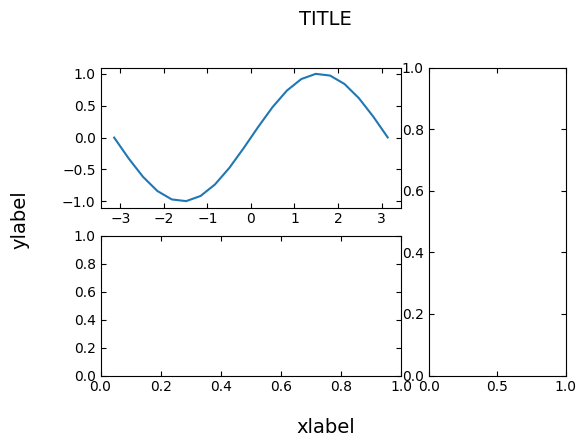

In [2]:
# First define a gridshape here similar to a 2x3 matrix
gridshape=(2,3)
plot=hyuplt.PlotGrid(gridshape=gridshape,figsize=(4,6))

# define three subplots gs[0,:2]; gs[:,2]; and gs[1,:2]
axshape=[[0,1,0,2],[0,0,2,3],[1,2,0,2]]
# create axs
plot.GetAXS(axshape=axshape)
# plot the Label of the figure
plot.xlabel="xlabel"
plot.ylabel="ylabel"
plot.title="TITLE"
plot.FigLabel(x_position=-0.02,y_position=-0.01)

# plot something random in the first axs
# obtain ax from axs
ax = plot.axs[0]
X= np.linspace(-3.14,3.14,20)
Y= np.sin(X)
ax.plot(X,Y,'-')
# plt.tight_layout()

print('hi')
# show the details of the plot
# print(plot)

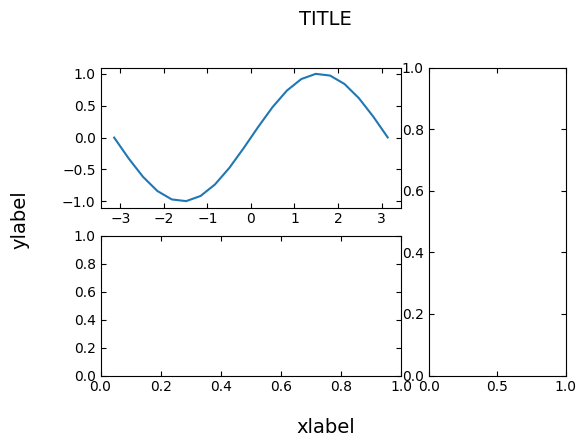

In [4]:
# A cool thing is that the plot can now be shown at another block by either ways
display(plot.fig) #preferred
# plot.fig

Let's make some plots about our orbits 

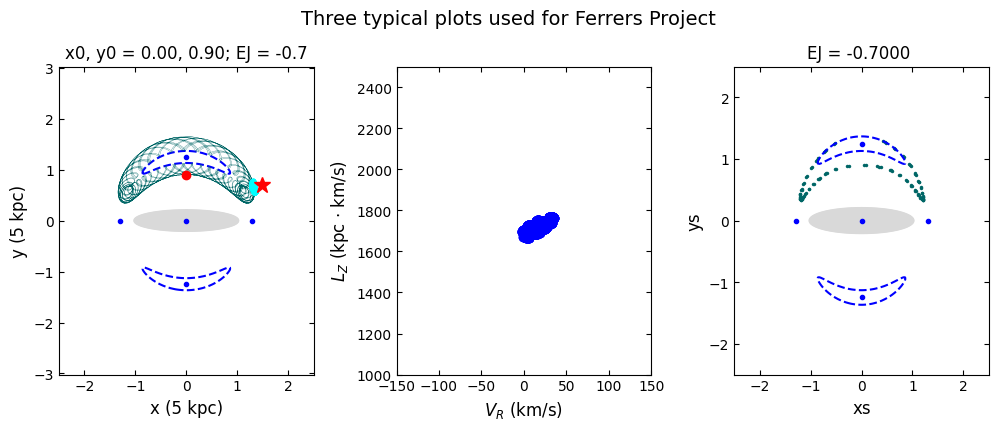

In [11]:
# Let's make some plots about our orbits 
# creat a 1x3 grid
plot=hyuplt.PlotGrid(figsize=(4,12),gridshape=(1,3))
plot.wspace=.325 #allow some extra wspace for labels

# Let's be simple, just one subplot per gridpoint
plot.GetAXS()
plot.xlabel=None
plot.ylabel=None
plot.title='Three typical plots used for Ferrers Project'
plot.FigLabel()

# get the axs
axs=plot.axs

# define the initial condition with EJ
init=ferrers.InitialCondition(ej=-.7,y0=.9)
init.InitFromEj()
# print(init)

# Get an instance from orbitplot
orbitplot=ferrers.PlotFerrers(init=init)

# plot the orbit in the XY plane in the first subplot
ax=axs[0]
# integrate orbit
orbitplot.GetOrbit()
# plot the XY plane
orbitplot.PlotXY(linewidth=.2,ax=ax)
# plot the sun and SNd passing orbits
orbitplot.PlotSNd(ax=ax,markersize=12)

# plot the SNd-LzVr in the second subplot (M2K)
ax=axs[1]
Lz_Nd,vr_Nd=orbitplot.PlotM2K(ax=ax) 
# Usually we do this on top of the LzVr density in the solar neighbourhood

# plot the surface of secation of this orbit in the third plot
ax=axs[2]
xs,ys=orbitplot.PlotSOS(ax=ax)
